# DIABETES PREDICTION
The task is to use Machine Learning algorithms to predict whether a person has diabetes or not. The outcome is based on the information about the patient such as the number of Pregnancies the patient had, the Glucose level, the Blood Pressure, the Skin Thickness, the	Insulin level, BMI, Diabetes Pedigree Function and Age. 

In [1]:
#import the required modules

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import *
style.use("ggplot")
%matplotlib inline
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import plot_confusion_matrix, f1_score, matthews_corrcoef


# For feature creation
# Degree 2 is used here but one can set the degree to be a hyperparameter to further explore the accuracy of the model
#poly = PolynomialFeatures(degree = 2)

#importing the classifiers
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Perceptron

#for combining multiple models into one 
from sklearn.ensemble import StackingClassifier

In [2]:
#read the dataset 
#the data was saved on my computer, so you can edit the file path to suit you
#this could be a url

diabetes_data = pd.read_csv("/Users/apple/Documents/OPEN_UNIVERSITY/Data_for_DataScience/Diabetes/diabetes-dataset.csv")


In [3]:
#set what the datasets look like
print(diabetes_data.shape)
diabetes_data.head()

(2000, 9)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138,62,35,0,33.6,0.127,47,1
1,0,84,82,31,125,38.2,0.233,23,0
2,0,145,0,0,0,44.2,0.630,31,1
3,0,135,68,42,250,42.3,0.365,24,1
4,1,139,62,41,480,40.7,0.536,21,0


In [4]:
# info about the datasets: to check if the dataset has null values
print(diabetes_data.info())
print(diabetes_data.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               2000 non-null   int64  
 1   Glucose                   2000 non-null   int64  
 2   BloodPressure             2000 non-null   int64  
 3   SkinThickness             2000 non-null   int64  
 4   Insulin                   2000 non-null   int64  
 5   BMI                       2000 non-null   float64
 6   DiabetesPedigreeFunction  2000 non-null   float64
 7   Age                       2000 non-null   int64  
 8   Outcome                   2000 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 140.8 KB
None
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                   

# Exploratory Analysis
Some analysis of the data is done to check the dependence of the feature variables to the label variable

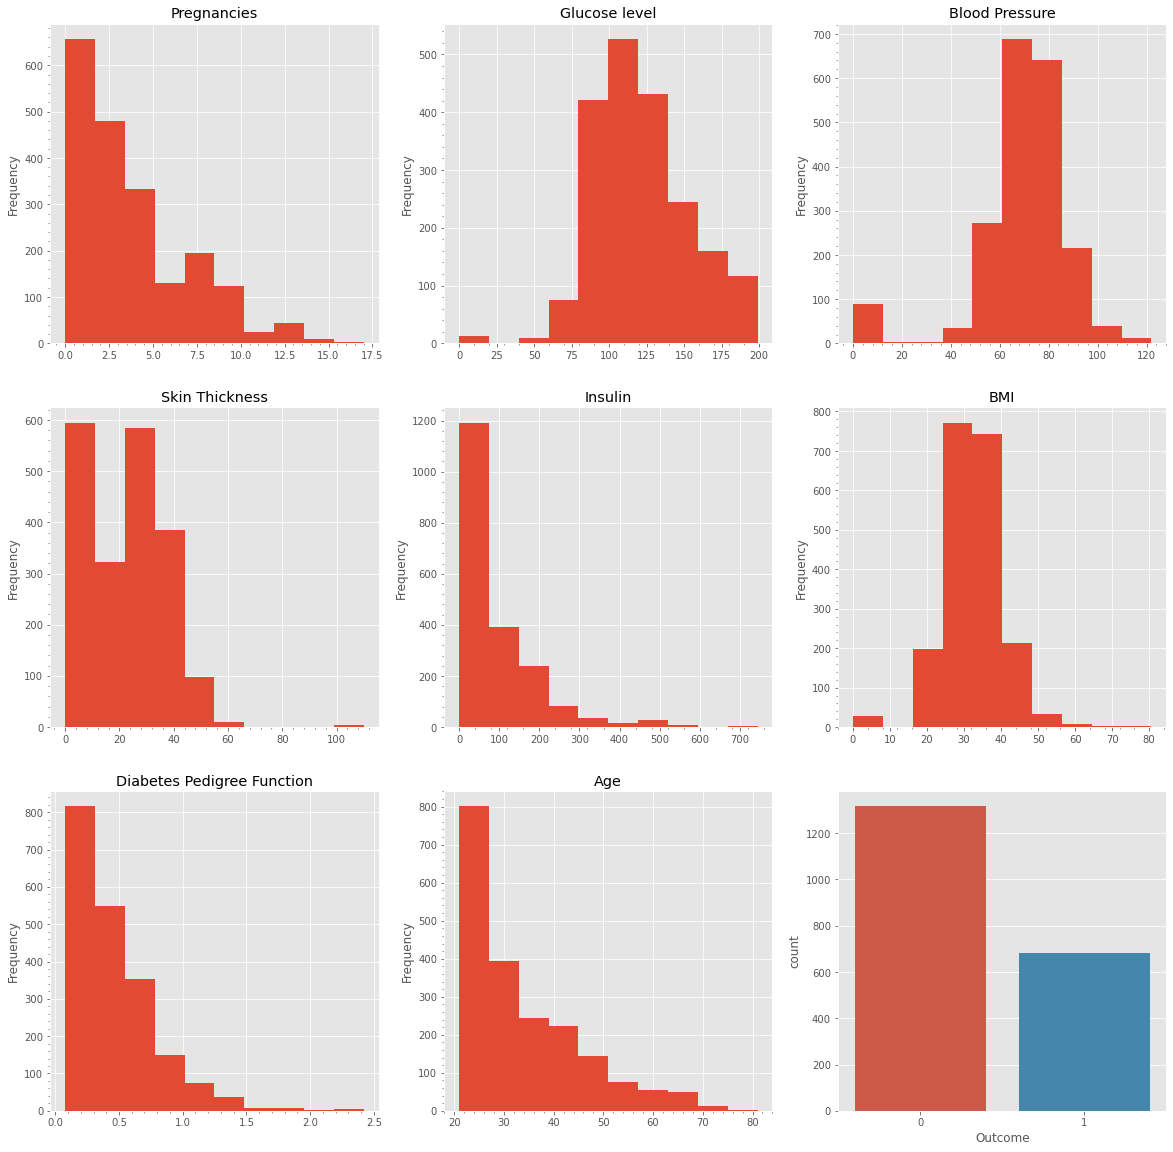

In [5]:
#checking dependencies
plt.rcParams['figure.figsize'] = (20.0, 20.0)
fig, ax = plt.subplots(nrows = 3, ncols = 3)

diabetes_data['Pregnancies'].plot.hist(ax = ax[0,0], title = 'Pregnancies')
ax[0,0].yaxis.set_minor_locator(MultipleLocator(20))
ax[0,0].xaxis.set_minor_locator(MultipleLocator(0.5))

diabetes_data["Glucose"].plot.hist(ax = ax[0,1], title = 'Glucose level')
ax[0,1].yaxis.set_minor_locator(MultipleLocator(20))
ax[0,1].xaxis.set_minor_locator(MultipleLocator(10))

diabetes_data['BloodPressure'].plot.hist(ax = ax[0,2], title = 'Blood Pressure')
ax[0,2].yaxis.set_minor_locator(MultipleLocator(20))
ax[0,2].xaxis.set_minor_locator(MultipleLocator(4))

diabetes_data['SkinThickness'].plot.hist(ax = ax[1,0], title = 'Skin Thickness')
ax[1,0].yaxis.set_minor_locator(MultipleLocator(20))
ax[1,0].xaxis.set_minor_locator(MultipleLocator(4))

diabetes_data['Insulin'].plot.hist(ax = ax[1,1], title = 'Insulin')
ax[1,1].yaxis.set_minor_locator(MultipleLocator(40))
ax[1,1].xaxis.set_minor_locator(MultipleLocator(40))

diabetes_data['BMI'].plot.hist(ax = ax[1,2], title = 'BMI')
ax[1,2].yaxis.set_minor_locator(MultipleLocator(20))
ax[1,2].xaxis.set_minor_locator(MultipleLocator(4))

diabetes_data['DiabetesPedigreeFunction'].plot.hist(ax = ax[2,0], title = 'Diabetes Pedigree Function')
ax[2,0].yaxis.set_minor_locator(MultipleLocator(20))
ax[2,0].xaxis.set_minor_locator(MultipleLocator(0.1))

diabetes_data['Age'].plot.hist(ax = ax[2,1], title = 'Age')
ax[2,1].yaxis.set_minor_locator(MultipleLocator(20))
ax[2,1].xaxis.set_minor_locator(MultipleLocator(2))

sns.countplot(ax = ax[2,2], x = "Outcome", data = diabetes_data)

plt.show()


# Data Splitting

In [6]:
#split the data into features and labels
x = diabetes_data.drop(["Outcome"], axis = 1)
y = diabetes_data["Outcome"]

#split the data into training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size = 0.25, random_state = 42)

In [7]:
#scale the data due to large range of of the distribution
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Calling the models

In [8]:
#Keep all the classifiers in a list so that the testing and training can be done once and for all
#then one can choose the one with the best accuracy
classifiers_ = [
    ("AdaBoost", AdaBoostClassifier()),
    ("Decision Tree", DecisionTreeClassifier(max_depth=10)),
    ("Gaussian Process", GaussianProcessClassifier(1.0 * RBF(1.0))),
    ("Linear SVM", SVC(kernel="linear", C=1,probability=True)),
    ("Naive Bayes",GaussianNB()),
    ("Nearest Neighbors",KNeighborsClassifier(2)),
    ("Neural Net",MLPClassifier(alpha=1)),
    ("QDA", QuadraticDiscriminantAnalysis()),
    ("Random Forest",RandomForestClassifier(n_jobs=2, random_state=1)),
    ("RBF SVM",SVC(gamma=2, C=1,probability=True)),
    ("SGDClassifier", SGDClassifier(max_iter=1000, tol=10e-3,penalty='elasticnet')),
    ("LogisticRegression", LogisticRegression()), 
    ("Perceptron", Perceptron(tol=1e-3, random_state=0)), 
    ("BaggingClassifier", BaggingClassifier(base_estimator=SVC(), n_estimators=10, random_state=0))
    ] 

0 : AdaBoost training done! 
 
              precision    recall  f1-score   support

           0       0.82      0.87      0.84       320
           1       0.74      0.67      0.70       180

    accuracy                           0.80       500
   macro avg       0.78      0.77      0.77       500
weighted avg       0.79      0.80      0.79       500

[[278  42]
 [ 60 120]]


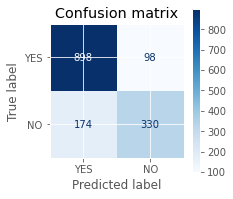

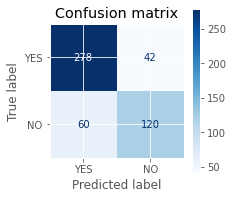

The Training Accuracy Score:  0.8186666666666667
The Training F1 Score:  0.7081545064377682
The Training Matthews coefficient:  0.5819532010922379
AdaBoost training score done!
The Accuracy Score:  0.796
Test F1 Score:  0.7017543859649122
The Testing Matthews coefficient:  0.5491452991452992
AdaBoost testing score done!
-------------------------------------------------------
  
1 : Decision Tree training done! 
 
              precision    recall  f1-score   support

           0       0.98      0.94      0.96       320
           1       0.90      0.97      0.93       180

    accuracy                           0.95       500
   macro avg       0.94      0.95      0.95       500
weighted avg       0.95      0.95      0.95       500

[[300  20]
 [  5 175]]


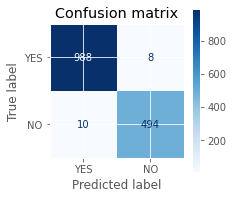

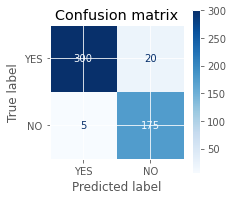

The Training Accuracy Score:  0.988
The Training F1 Score:  0.982107355864811
The Training Matthews coefficient:  0.973084681174499
Decision Tree training score done!
The Accuracy Score:  0.95
Test F1 Score:  0.9333333333333333
The Testing Matthews coefficient:  0.8952675018476632
Decision Tree testing score done!
-------------------------------------------------------
  
2 : Gaussian Process training done! 
 
              precision    recall  f1-score   support

           0       0.98      0.96      0.97       320
           1       0.94      0.97      0.95       180

    accuracy                           0.96       500
   macro avg       0.96      0.96      0.96       500
weighted avg       0.96      0.96      0.96       500

[[308  12]
 [  6 174]]


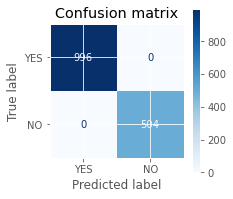

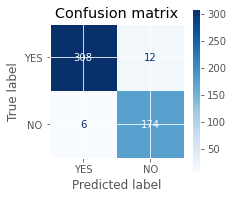

The Training Accuracy Score:  1.0
The Training F1 Score:  1.0
The Training Matthews coefficient:  1.0
Gaussian Process training score done!
The Accuracy Score:  0.964
Test F1 Score:  0.9508196721311476
The Testing Matthews coefficient:  0.9227489653407709
Gaussian Process testing score done!
-------------------------------------------------------
  
3 : Linear SVM training done! 
 
              precision    recall  f1-score   support

           0       0.80      0.90      0.85       320
           1       0.77      0.61      0.68       180

    accuracy                           0.79       500
   macro avg       0.79      0.75      0.76       500
weighted avg       0.79      0.79      0.79       500

[[287  33]
 [ 70 110]]


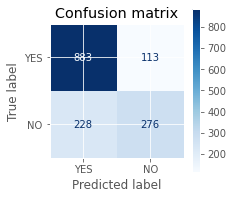

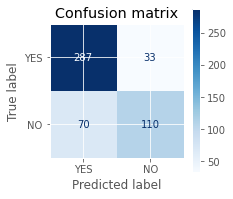

The Training Accuracy Score:  0.7726666666666666
The Training F1 Score:  0.6181410974244121
The Training Matthews coefficient:  0.4679162737002829
Linear SVM training score done!
The Accuracy Score:  0.794
Test F1 Score:  0.6811145510835914
The Testing Matthews coefficient:  0.5395863482176314
Linear SVM testing score done!
-------------------------------------------------------
  
4 : Naive Bayes training done! 
 
              precision    recall  f1-score   support

           0       0.81      0.87      0.84       320
           1       0.73      0.64      0.69       180

    accuracy                           0.79       500
   macro avg       0.77      0.76      0.76       500
weighted avg       0.78      0.79      0.78       500

[[278  42]
 [ 64 116]]


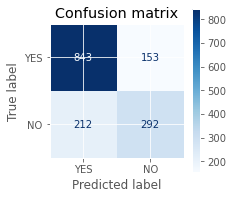

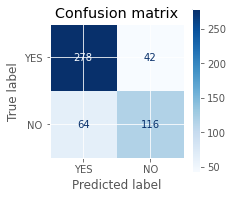

The Training Accuracy Score:  0.7566666666666667
The Training F1 Score:  0.6153846153846153
The Training Matthews coefficient:  0.4402445544983717
Naive Bayes training score done!
The Accuracy Score:  0.788
Test F1 Score:  0.6863905325443788
The Testing Matthews coefficient:  0.5298483564272697
Naive Bayes testing score done!
-------------------------------------------------------
  
5 : Nearest Neighbors training done! 
 
              precision    recall  f1-score   support

           0       0.87      0.97      0.91       320
           1       0.93      0.73      0.82       180

    accuracy                           0.88       500
   macro avg       0.90      0.85      0.87       500
weighted avg       0.89      0.88      0.88       500

[[310  10]
 [ 48 132]]


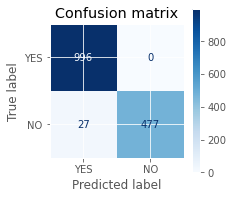

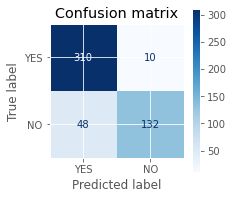

The Training Accuracy Score:  0.982
The Training F1 Score:  0.9724770642201834
The Training Matthews coefficient:  0.9599216208752211
Nearest Neighbors training score done!
The Accuracy Score:  0.884
Test F1 Score:  0.8198757763975155
The Testing Matthews coefficient:  0.747333103012393
Nearest Neighbors testing score done!
-------------------------------------------------------
  
6 : Neural Net training done! 
 
              precision    recall  f1-score   support

           0       0.83      0.89      0.86       320
           1       0.78      0.67      0.72       180

    accuracy                           0.81       500
   macro avg       0.80      0.78      0.79       500
weighted avg       0.81      0.81      0.81       500

[[286  34]
 [ 60 120]]


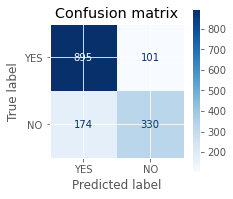

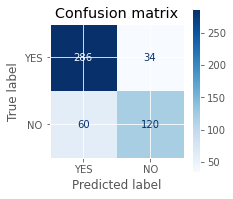

The Training Accuracy Score:  0.8166666666666667
The Training F1 Score:  0.7058823529411766
The Training Matthews coefficient:  0.5775934965452948
Neural Net training score done!
The Accuracy Score:  0.812
Test F1 Score:  0.7185628742514969
The Testing Matthews coefficient:  0.5826716320222362
Neural Net testing score done!
-------------------------------------------------------
  
7 : QDA training done! 
 
              precision    recall  f1-score   support

           0       0.82      0.90      0.85       320
           1       0.78      0.64      0.70       180

    accuracy                           0.80       500
   macro avg       0.80      0.77      0.78       500
weighted avg       0.80      0.80      0.80       500

[[287  33]
 [ 65 115]]


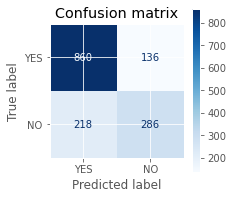

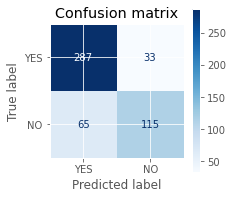

The Training Accuracy Score:  0.764
The Training F1 Score:  0.6177105831533477
The Training Matthews coefficient:  0.4526578636781865
QDA training score done!
The Accuracy Score:  0.804
Test F1 Score:  0.7012195121951219
The Testing Matthews coefficient:  0.5633554376303032
QDA testing score done!
-------------------------------------------------------
  
8 : Random Forest training done! 
 
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       320
           1       0.97      0.97      0.97       180

    accuracy                           0.98       500
   macro avg       0.98      0.98      0.98       500
weighted avg       0.98      0.98      0.98       500

[[315   5]
 [  6 174]]


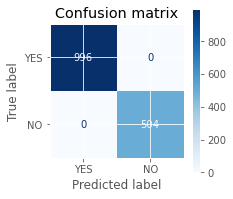

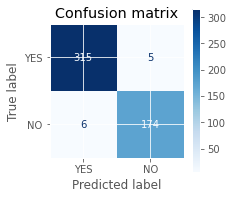

The Training Accuracy Score:  1.0
The Training F1 Score:  1.0
The Training Matthews coefficient:  1.0
Random Forest training score done!
The Accuracy Score:  0.978
Test F1 Score:  0.9693593314763231
The Testing Matthews coefficient:  0.9522078435050099
Random Forest testing score done!
-------------------------------------------------------
  
9 : RBF SVM training done! 
 
              precision    recall  f1-score   support

           0       0.94      0.99      0.97       320
           1       0.98      0.89      0.94       180

    accuracy                           0.96       500
   macro avg       0.96      0.94      0.95       500
weighted avg       0.96      0.96      0.96       500

[[317   3]
 [ 19 161]]


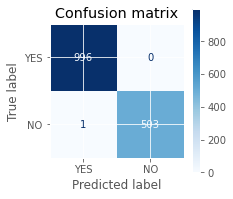

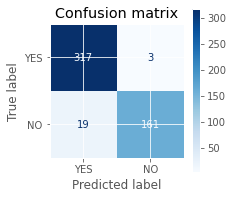

The Training Accuracy Score:  0.9993333333333333
The Training F1 Score:  0.9990069513406157
The Training Matthews coefficient:  0.998506311490352
RBF SVM training score done!
The Accuracy Score:  0.956
Test F1 Score:  0.936046511627907
The Testing Matthews coefficient:  0.9048925792346101
RBF SVM testing score done!
-------------------------------------------------------
  
10 : SGDClassifier training done! 
 
              precision    recall  f1-score   support

           0       0.68      0.82      0.75       320
           1       0.50      0.32      0.39       180

    accuracy                           0.64       500
   macro avg       0.59      0.57      0.57       500
weighted avg       0.62      0.64      0.62       500

[[263  57]
 [123  57]]


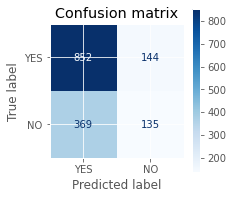

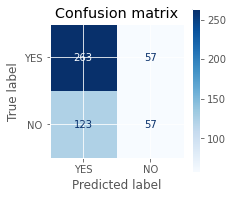

The Training Accuracy Score:  0.658
The Training F1 Score:  0.3448275862068966
The Training Matthews coefficient:  0.14964889225415046
SGDClassifier training score done!
The Accuracy Score:  0.64
Test F1 Score:  0.3877551020408163
The Testing Matthews coefficient:  0.15850595080987218
SGDClassifier testing score done!
-------------------------------------------------------
  
11 : LogisticRegression training done! 
 
              precision    recall  f1-score   support

           0       0.80      0.91      0.85       320
           1       0.78      0.59      0.68       180

    accuracy                           0.79       500
   macro avg       0.79      0.75      0.76       500
weighted avg       0.79      0.79      0.79       500

[[290  30]
 [ 73 107]]


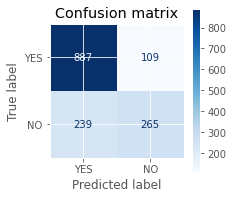

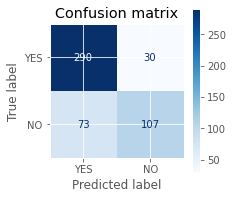

The Training Accuracy Score:  0.768
The Training F1 Score:  0.6036446469248292
The Training Matthews coefficient:  0.45457407544602835
LogisticRegression training score done!
The Accuracy Score:  0.794
Test F1 Score:  0.6750788643533123
The Testing Matthews coefficient:  0.5388531403998482
LogisticRegression testing score done!
-------------------------------------------------------
  
12 : Perceptron training done! 
 
              precision    recall  f1-score   support

           0       0.74      0.88      0.80       320
           1       0.68      0.45      0.54       180

    accuracy                           0.72       500
   macro avg       0.71      0.66      0.67       500
weighted avg       0.72      0.72      0.71       500

[[281  39]
 [ 99  81]]


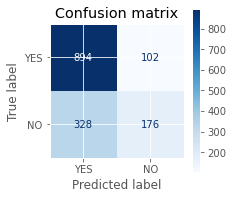

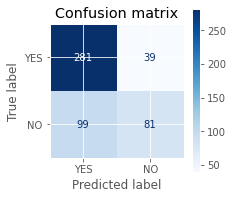

The Training Accuracy Score:  0.7133333333333334
The Training F1 Score:  0.45012787723785164
The Training Matthews coefficient:  0.30000348764428314
Perceptron training score done!
The Accuracy Score:  0.724
Test F1 Score:  0.54
The Testing Matthews coefficient:  0.368780663310292
Perceptron testing score done!
-------------------------------------------------------
  
13 : BaggingClassifier training done! 
 
              precision    recall  f1-score   support

           0       0.85      0.92      0.88       320
           1       0.84      0.71      0.77       180

    accuracy                           0.85       500
   macro avg       0.84      0.82      0.83       500
weighted avg       0.85      0.85      0.84       500

[[295  25]
 [ 52 128]]


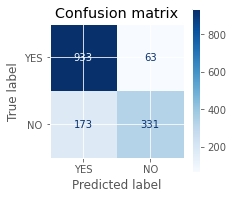

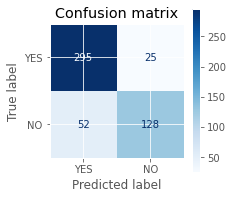

The Training Accuracy Score:  0.8426666666666667
The Training F1 Score:  0.7371937639198219
The Training Matthews coefficient:  0.6369933206414371
BaggingClassifier training score done!
The Accuracy Score:  0.846
Test F1 Score:  0.7687687687687688
The Testing Matthews coefficient:  0.6593180565516713
BaggingClassifier testing score done!
-------------------------------------------------------
  
Names:  ['AdaBoost', 'Decision Tree', 'Gaussian Process', 'Linear SVM', 'Naive Bayes', 'Nearest Neighbors', 'Neural Net', 'QDA', 'Random Forest', 'RBF SVM', 'SGDClassifier', 'LogisticRegression', 'Perceptron', 'BaggingClassifier']
Train Accuracy Scores:  [0.819, 0.988, 1.0, 0.773, 0.757, 0.982, 0.817, 0.764, 1.0, 0.999, 0.658, 0.768, 0.713, 0.843]
Test Accuracy Scores:  [0.796, 0.95, 0.964, 0.794, 0.788, 0.884, 0.812, 0.804, 0.978, 0.956, 0.64, 0.794, 0.724, 0.846]
Train F1 Scores:  [0.708, 0.982, 1.0, 0.618, 0.615, 0.972, 0.706, 0.618, 1.0, 0.999, 0.345, 0.604, 0.45, 0.737]
Test F1 Scores:  [0

In [9]:
plt.rcParams['figure.figsize'] = (3.0, 3.0)
#use each Classifier to take its training results.
clf_names = []
train_accuracy_score = []
test_accuracy_score = []
predict_sums = []
test_f1score = []
train_f1score = []
test_matthews = []
train_matthews = []
i = 0

for n,clf in classifiers_:
    clf_names.append(n)
    
    # Model training
    clf.fit(X_train, y_train)
    print(i, ":",  n+" training done! \n ")
    
    # The prediction for both training and testing 
    clf.predict(X_test)
    clf.predict(X_train)
    predict_sums.append(clf.predict(X_test).sum()) 
        #you can print the classification report and confusion matrix if you like
    print(classification_report(y_test, clf.predict(X_test)))
    print(confusion_matrix(y_test, clf.predict(X_test)))
    
    #you can also plot the confussion matrix if you like
    disp1 = plot_confusion_matrix(clf, X_train, y_train,
                              display_labels=['YES','NO'],
                              cmap=plt.cm.Blues,
                              normalize=None)
    disp1.ax_.set_title('Confusion matrix')
    plt.show()
    
    disp = plot_confusion_matrix(clf, X_test, y_test,
                              display_labels=['YES','NO'],
                              cmap=plt.cm.Blues,
                              normalize=None)
    disp.ax_.set_title('Confusion matrix')
    plt.show()
    
    # Measure training accuracy and score
    train_accuracy_score.append(round(accuracy_score(y_train, clf.predict(X_train)), 3))
    train_matthews.append(round(matthews_corrcoef(y_train, clf.predict(X_train)),3))
    train_f1score.append(round(f1_score(y_train, clf.predict(X_train)),3))
    print("The Training Accuracy Score: ", accuracy_score(y_train, clf.predict(X_train)) )
    print("The Training F1 Score: ", f1_score(y_train, clf.predict(X_train)) )
    print("The Training Matthews coefficient: ", matthews_corrcoef(y_train, clf.predict(X_train)))
    print(n+" training score done!")
    
    # Measure test accuracy and score
    test_accuracy_score.append(round(accuracy_score(y_test, clf.predict(X_test)), 3))
    test_f1score.append(round(f1_score(y_test, clf.predict(X_test)),3))
    test_matthews.append(round(matthews_corrcoef(y_test, clf.predict(X_test)),3))
    print("The Accuracy Score: ", accuracy_score(y_test, clf.predict(X_test)))
    print("Test F1 Score: ",f1_score(y_test,clf.predict(X_test)))
    print("The Testing Matthews coefficient: ", matthews_corrcoef(y_test, clf.predict(X_test)))
    print(n+" testing score done!")
    print("-------------------------------------------------------")
    print("  ")
    i = i+1
print("Names: ", clf_names)
print("Train Accuracy Scores: ", train_accuracy_score)
print("Test Accuracy Scores: ", test_accuracy_score)
print("Train F1 Scores: ", train_f1score)
print("Test F1 Scores: ", test_f1score)
print("Train Matthews Coefficients", train_matthews)
print("Test Matthews Coefficients", test_matthews)

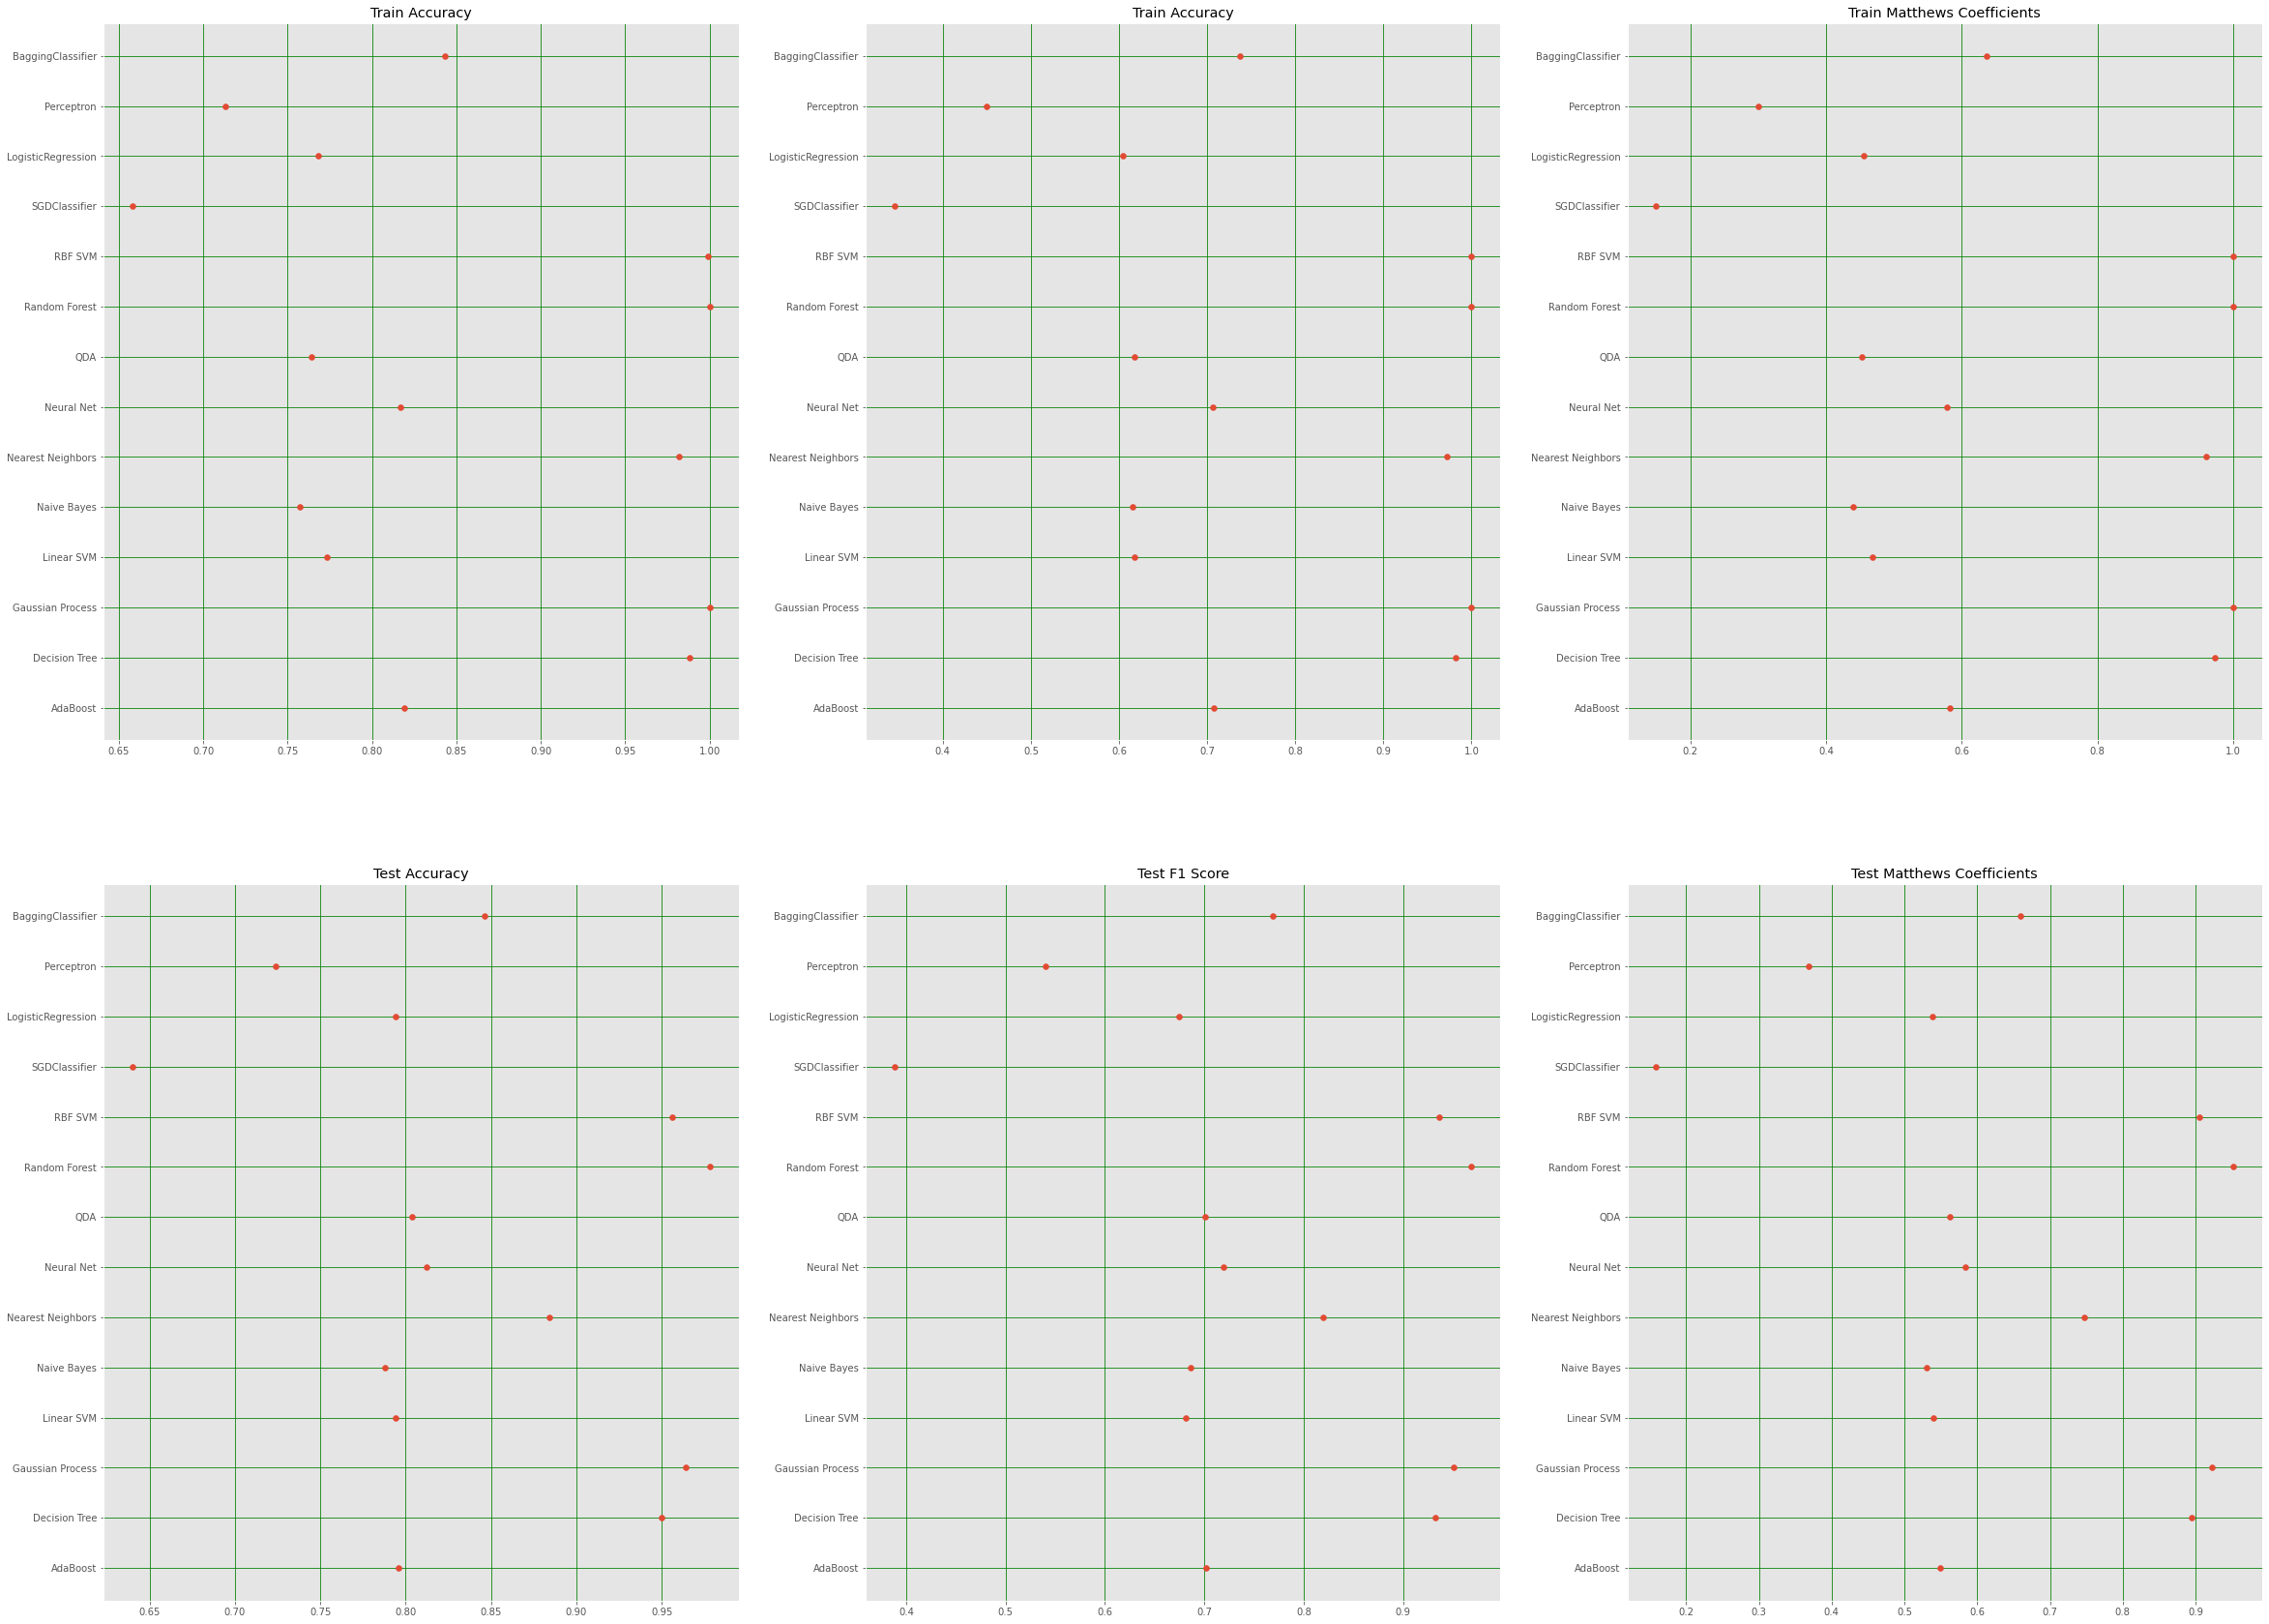

In [10]:
plt.rcParams['figure.figsize'] = (40.0, 30.0)
figs, ax = plt.subplots(2,3)

ax[0,0].scatter(x =  train_accuracy_score,y = clf_names)
ax[0,0].set_title("Train Accuracy")
ax[0,0].grid(True, color = 'g')

ax[0,1].scatter(x =  train_f1score,y = clf_names)
ax[0,1].set_title("Train Accuracy")
ax[0,1].grid(True, color = 'g')

ax[0,2].scatter(x =  train_matthews,y = clf_names)
ax[0,2].set_title("Train Matthews Coefficients")
ax[0,2].grid(True, color = 'g')


ax[1,0].scatter(test_accuracy_score,clf_names)
ax[1,0].set_title("Test Accuracy")
ax[1,0].grid(True, color = 'g')


ax[1,1].scatter(test_f1score,clf_names)
ax[1,1].set_title("Test F1 Score")
ax[1,1].grid(True, color = 'g')

ax[1,2].scatter(test_matthews,clf_names)
ax[1,2].set_title("Test Matthews Coefficients")
ax[1,2].grid(True, color = 'g')

plt.show()

From the graphs above, one would notice overfitting on the Random Forest classifier and Gaussian process but they also showed the best test accuracy. This is followed by the Radial Basis Function (RBF) kernel of the Support Vector Machine (SVM), Decision Tree and Nearest Neighbors.  

# Polynomial Features

In [11]:
#The PolynomialFeatures will be used for feature creation to explore the nonlinear pattern of the numerical data.
from sklearn.preprocessing import PolynomialFeatures
#The Pipeline is used to package the feature creator and the classifier.
from sklearn.pipeline import Pipeline


# For feature creation
# Degree 2 is used here but one can set the degree to be a hyperparameter to further explore the accuracy of the model
poly = PolynomialFeatures(degree = 2)

0 : AdaBoost training done! 
 
              precision    recall  f1-score   support

           0       0.86      0.86      0.86       320
           1       0.75      0.76      0.75       180

    accuracy                           0.82       500
   macro avg       0.81      0.81      0.81       500
weighted avg       0.82      0.82      0.82       500

[[274  46]
 [ 43 137]]


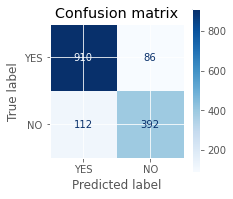

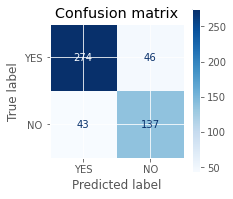

The Training Accuracy Score:  0.868
The Training F1 Score:  0.7983706720977597
The Training Matthews coefficient:  0.7008987174264815
AdaBoost training score done!
The Accuracy Score:  0.822
Test F1 Score:  0.7548209366391184
The Testing Matthews coefficient:  0.6151702642374863
AdaBoost testing score done!
-------------------------------------------------------
  
1 : Decision Tree training done! 
 
              precision    recall  f1-score   support

           0       0.93      0.95      0.94       320
           1       0.90      0.87      0.89       180

    accuracy                           0.92       500
   macro avg       0.92      0.91      0.91       500
weighted avg       0.92      0.92      0.92       500

[[303  17]
 [ 23 157]]


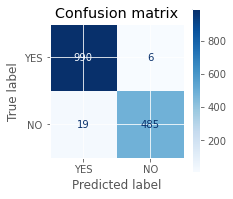

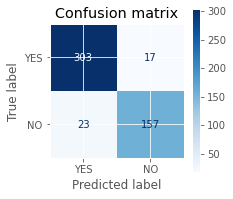

The Training Accuracy Score:  0.9833333333333333
The Training F1 Score:  0.9748743718592964
The Training Matthews coefficient:  0.962592650849272
Decision Tree training score done!
The Accuracy Score:  0.92
Test F1 Score:  0.8870056497175142
The Testing Matthews coefficient:  0.8253977309725034
Decision Tree testing score done!
-------------------------------------------------------
  
2 : Gaussian Process training done! 
 
              precision    recall  f1-score   support

           0       0.98      0.95      0.97       320
           1       0.92      0.97      0.94       180

    accuracy                           0.96       500
   macro avg       0.95      0.96      0.95       500
weighted avg       0.96      0.96      0.96       500

[[305  15]
 [  6 174]]


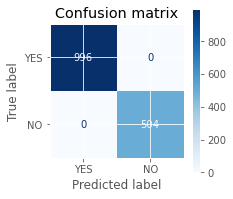

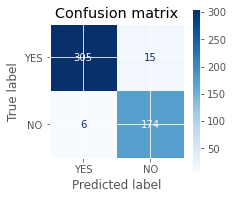

The Training Accuracy Score:  1.0
The Training F1 Score:  1.0
The Training Matthews coefficient:  1.0
Gaussian Process training score done!
The Accuracy Score:  0.958
Test F1 Score:  0.943089430894309
The Testing Matthews coefficient:  0.9105202640213195
Gaussian Process testing score done!
-------------------------------------------------------
  
3 : Linear SVM training done! 
 
              precision    recall  f1-score   support

           0       0.82      0.92      0.87       320
           1       0.82      0.65      0.72       180

    accuracy                           0.82       500
   macro avg       0.82      0.78      0.80       500
weighted avg       0.82      0.82      0.82       500

[[294  26]
 [ 63 117]]


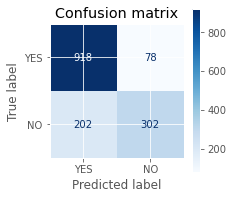

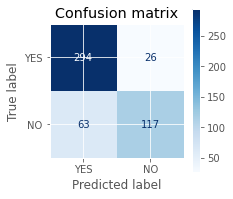

The Training Accuracy Score:  0.8133333333333334
The Training F1 Score:  0.6832579185520361
The Training Matthews coefficient:  0.5657085325326787
Linear SVM training score done!
The Accuracy Score:  0.822
Test F1 Score:  0.7244582043343654
The Testing Matthews coefficient:  0.6041301697747643
Linear SVM testing score done!
-------------------------------------------------------
  
4 : Naive Bayes training done! 
 
              precision    recall  f1-score   support

           0       0.76      0.90      0.82       320
           1       0.73      0.49      0.59       180

    accuracy                           0.75       500
   macro avg       0.75      0.69      0.70       500
weighted avg       0.75      0.75      0.74       500

[[288  32]
 [ 92  88]]


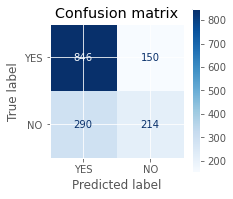

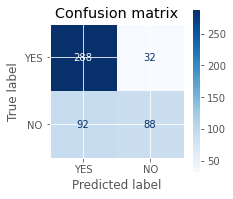

The Training Accuracy Score:  0.7066666666666667
The Training F1 Score:  0.49308755760368667
The Training Matthews coefficient:  0.301895649918654
Naive Bayes training score done!
The Accuracy Score:  0.752
Test F1 Score:  0.5866666666666667
The Testing Matthews coefficient:  0.43707337873812385
Naive Bayes testing score done!
-------------------------------------------------------
  
5 : Nearest Neighbors training done! 
 
              precision    recall  f1-score   support

           0       0.86      0.97      0.91       320
           1       0.93      0.72      0.81       180

    accuracy                           0.88       500
   macro avg       0.89      0.85      0.86       500
weighted avg       0.89      0.88      0.88       500

[[310  10]
 [ 50 130]]


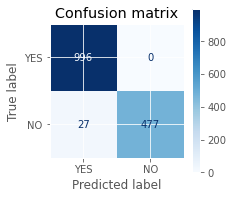

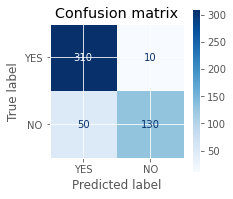

The Training Accuracy Score:  0.982
The Training F1 Score:  0.9724770642201834
The Training Matthews coefficient:  0.9599216208752211
Nearest Neighbors training score done!
The Accuracy Score:  0.88
Test F1 Score:  0.8125000000000001
The Testing Matthews coefficient:  0.7386803769523952
Nearest Neighbors testing score done!
-------------------------------------------------------
  


/Users/apple/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


6 : Neural Net training done! 
 
              precision    recall  f1-score   support

           0       0.91      0.93      0.92       320
           1       0.87      0.84      0.86       180

    accuracy                           0.90       500
   macro avg       0.89      0.89      0.89       500
weighted avg       0.90      0.90      0.90       500

[[298  22]
 [ 29 151]]


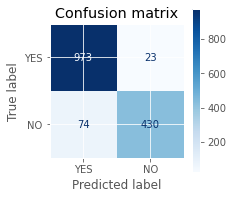

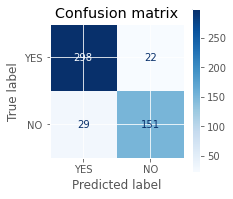

The Training Accuracy Score:  0.9353333333333333
The Training F1 Score:  0.8986415882967606
The Training Matthews coefficient:  0.8539719666192982
Neural Net training score done!
The Accuracy Score:  0.898
Test F1 Score:  0.8555240793201134
The Testing Matthews coefficient:  0.777111557266139
Neural Net testing score done!
-------------------------------------------------------
  
7 : QDA training done! 
 
              precision    recall  f1-score   support

           0       0.84      0.90      0.87       320
           1       0.79      0.71      0.75       180

    accuracy                           0.83       500
   macro avg       0.82      0.80      0.81       500
weighted avg       0.83      0.83      0.83       500

[[287  33]
 [ 53 127]]


/Users/apple/opt/anaconda3/lib/python3.8/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


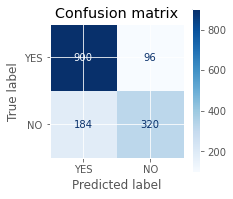

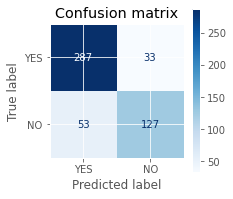

The Training Accuracy Score:  0.8133333333333334
The Training F1 Score:  0.6956521739130435
The Training Matthews coefficient:  0.5681953034767435
QDA training score done!
The Accuracy Score:  0.828
Test F1 Score:  0.7470588235294119
The Testing Matthews coefficient:  0.6198959275463601
QDA testing score done!
-------------------------------------------------------
  
8 : Random Forest training done! 
 
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       320
           1       0.96      0.97      0.96       180

    accuracy                           0.97       500
   macro avg       0.97      0.97      0.97       500
weighted avg       0.97      0.97      0.97       500

[[313   7]
 [  6 174]]


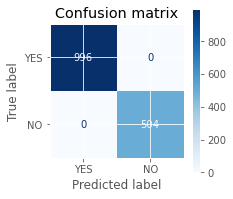

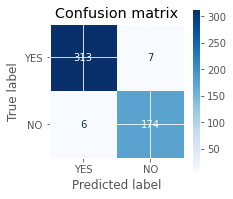

The Training Accuracy Score:  1.0
The Training F1 Score:  1.0
The Training Matthews coefficient:  1.0
Random Forest training score done!
The Accuracy Score:  0.974
Test F1 Score:  0.9639889196675899
The Testing Matthews coefficient:  0.9436537427761258
Random Forest testing score done!
-------------------------------------------------------
  
9 : RBF SVM training done! 
 
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       320
           1       1.00      0.90      0.95       180

    accuracy                           0.96       500
   macro avg       0.97      0.95      0.96       500
weighted avg       0.97      0.96      0.96       500

[[320   0]
 [ 18 162]]


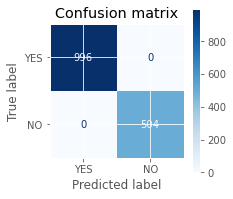

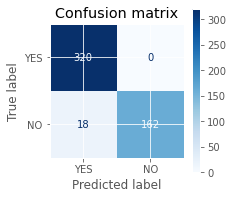

The Training Accuracy Score:  1.0
The Training F1 Score:  1.0
The Training Matthews coefficient:  1.0
RBF SVM training score done!
The Accuracy Score:  0.964
Test F1 Score:  0.9473684210526316
The Testing Matthews coefficient:  0.9230769230769231
RBF SVM testing score done!
-------------------------------------------------------
  
10 : SGDClassifier training done! 
 
              precision    recall  f1-score   support

           0       0.82      0.87      0.84       320
           1       0.74      0.67      0.70       180

    accuracy                           0.79       500
   macro avg       0.78      0.77      0.77       500
weighted avg       0.79      0.79      0.79       500

[[277  43]
 [ 60 120]]


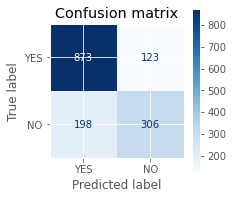

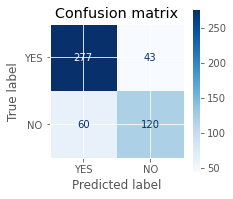

The Training Accuracy Score:  0.786
The Training F1 Score:  0.6559485530546623
The Training Matthews coefficient:  0.5055355991415139
SGDClassifier training score done!
The Accuracy Score:  0.794
Test F1 Score:  0.6997084548104955
The Testing Matthews coefficient:  0.5450698450387632
SGDClassifier testing score done!
-------------------------------------------------------
  
11 : LogisticRegression training done! 
 
              precision    recall  f1-score   support

           0       0.84      0.90      0.87       320
           1       0.80      0.69      0.74       180

    accuracy                           0.83       500
   macro avg       0.82      0.80      0.80       500
weighted avg       0.82      0.83      0.82       500

[[289  31]
 [ 56 124]]


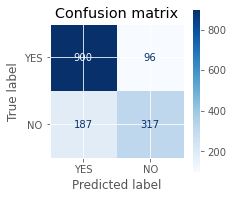

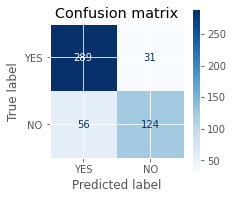

The Training Accuracy Score:  0.8113333333333334
The Training F1 Score:  0.6913849509269356
The Training Matthews coefficient:  0.563173491243524
LogisticRegression training score done!
The Accuracy Score:  0.826
Test F1 Score:  0.7402985074626866
The Testing Matthews coefficient:  0.6144233907165166
LogisticRegression testing score done!
-------------------------------------------------------
  
12 : Perceptron training done! 
 
              precision    recall  f1-score   support

           0       0.83      0.68      0.75       320
           1       0.57      0.76      0.65       180

    accuracy                           0.71       500
   macro avg       0.70      0.72      0.70       500
weighted avg       0.74      0.71      0.71       500

[[216 104]
 [ 43 137]]


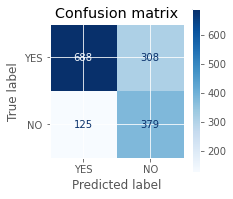

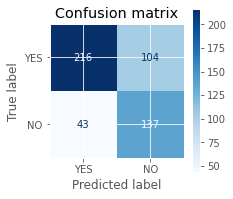

The Training Accuracy Score:  0.7113333333333334
The Training F1 Score:  0.6364399664147775
The Training Matthews coefficient:  0.4197368500774387
Perceptron training score done!
The Accuracy Score:  0.706
Test F1 Score:  0.6508313539192399
The Testing Matthews coefficient:  0.4189382266514977
Perceptron testing score done!
-------------------------------------------------------
  
13 : BaggingClassifier training done! 
 
              precision    recall  f1-score   support

           0       0.84      0.95      0.89       320
           1       0.88      0.68      0.77       180

    accuracy                           0.85       500
   macro avg       0.86      0.82      0.83       500
weighted avg       0.85      0.85      0.85       500

[[303  17]
 [ 57 123]]


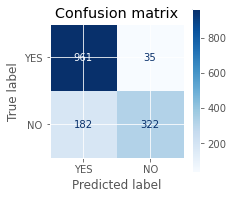

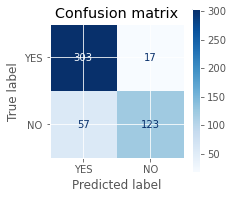

The Training Accuracy Score:  0.8553333333333333
The Training F1 Score:  0.7479674796747967
The Training Matthews coefficient:  0.6696434947566007
BaggingClassifier training score done!
The Accuracy Score:  0.852
Test F1 Score:  0.7687499999999999
The Testing Matthews coefficient:  0.6737210473209032
BaggingClassifier testing score done!
-------------------------------------------------------
  
Names:  ['AdaBoost', 'Decision Tree', 'Gaussian Process', 'Linear SVM', 'Naive Bayes', 'Nearest Neighbors', 'Neural Net', 'QDA', 'Random Forest', 'RBF SVM', 'SGDClassifier', 'LogisticRegression', 'Perceptron', 'BaggingClassifier']
Train Accuracy Scores:  [0.868, 0.983, 1.0, 0.813, 0.707, 0.982, 0.935, 0.813, 1.0, 1.0, 0.786, 0.811, 0.711, 0.855]
Test Accuracy Scores:  [0.822, 0.92, 0.958, 0.822, 0.752, 0.88, 0.898, 0.828, 0.974, 0.964, 0.794, 0.826, 0.706, 0.852]
Train F1 Scores:  [0.868, 0.983, 1.0, 0.813, 0.707, 0.982, 0.935, 0.813, 1.0, 1.0, 0.786, 0.811, 0.711, 0.855]
Test F1 Scores:  [0.75

In [12]:
plt.rcParams['figure.figsize'] = (3.0, 3.0)
#use each Classifier to take its training results.
clf_names = []
train_accuracy_score = []
test_accuracy_score = []
predict_sums = []
test_f1score = []
train_f1score = []
test_matthews = []
train_matthews = []
i = 0

for n,clf in classifiers_:
    clf_names.append(n)
    
    # Model declaration with pipeline
    clf = Pipeline([('POLY', poly),('CLF',clf)])
    
    # Model training
    clf.fit(X_train, y_train)
    print(i, ":",  n+" training done! \n ")
    
    # The prediction for both training and testing 
    clf.predict(X_test)
    clf.predict(X_train)
    predict_sums.append(clf.predict(X_test).sum()) 
        #you can print the classification report and confusion matrix if you like
    print(classification_report(y_test, clf.predict(X_test)))
    print(confusion_matrix(y_test, clf.predict(X_test)))
    
    #you can also plot the confussion matrix if you like
    disp1 = plot_confusion_matrix(clf, X_train, y_train,
                              display_labels=['YES','NO'],
                              cmap=plt.cm.Blues,
                              normalize=None)
    disp1.ax_.set_title('Confusion matrix')
    plt.show()
    
    disp = plot_confusion_matrix(clf, X_test, y_test,
                              display_labels=['YES','NO'],
                              cmap=plt.cm.Blues,
                              normalize=None)
    disp.ax_.set_title('Confusion matrix')
    plt.show()
    
    # Measure training accuracy
    train_accuracy_score.append(round(accuracy_score(y_train, clf.predict(X_train)), 3))
    train_matthews.append(round(matthews_corrcoef(y_train, clf.predict(X_train)),3))
    train_f1score.append(round(f1_score(y_train, clf.predict(X_train)),3))
    print("The Training Accuracy Score: ", accuracy_score(y_train, clf.predict(X_train)) )
    print("The Training F1 Score: ", f1_score(y_train, clf.predict(X_train)) )
    print("The Training Matthews coefficient: ", matthews_corrcoef(y_train, clf.predict(X_train)))
    print(n+" training score done!")
    
    # Measure test accuracy 
    test_accuracy_score.append(round(accuracy_score(y_test, clf.predict(X_test)), 3))
    test_f1score.append(round(f1_score(y_test, clf.predict(X_test)),3))
    test_matthews.append(round(matthews_corrcoef(y_test, clf.predict(X_test)),3))
    print("The Accuracy Score: ", accuracy_score(y_test, clf.predict(X_test)))
    print("Test F1 Score: ",f1_score(y_test,clf.predict(X_test)))
    print("The Testing Matthews coefficient: ", matthews_corrcoef(y_test, clf.predict(X_test)))
    print(n+" testing score done!")
    print("-------------------------------------------------------")
    print("  ")
    i = i+1
print("Names: ", clf_names)
print("Train Accuracy Scores: ", train_accuracy_score)
print("Test Accuracy Scores: ", test_accuracy_score)
print("Train F1 Scores: ", train_accuracy_score)
print("Test F1 Scores: ", test_f1score)
print("Train Matthews Coefficients", train_matthews)
print("Test Matthews Coefficients", test_matthews)

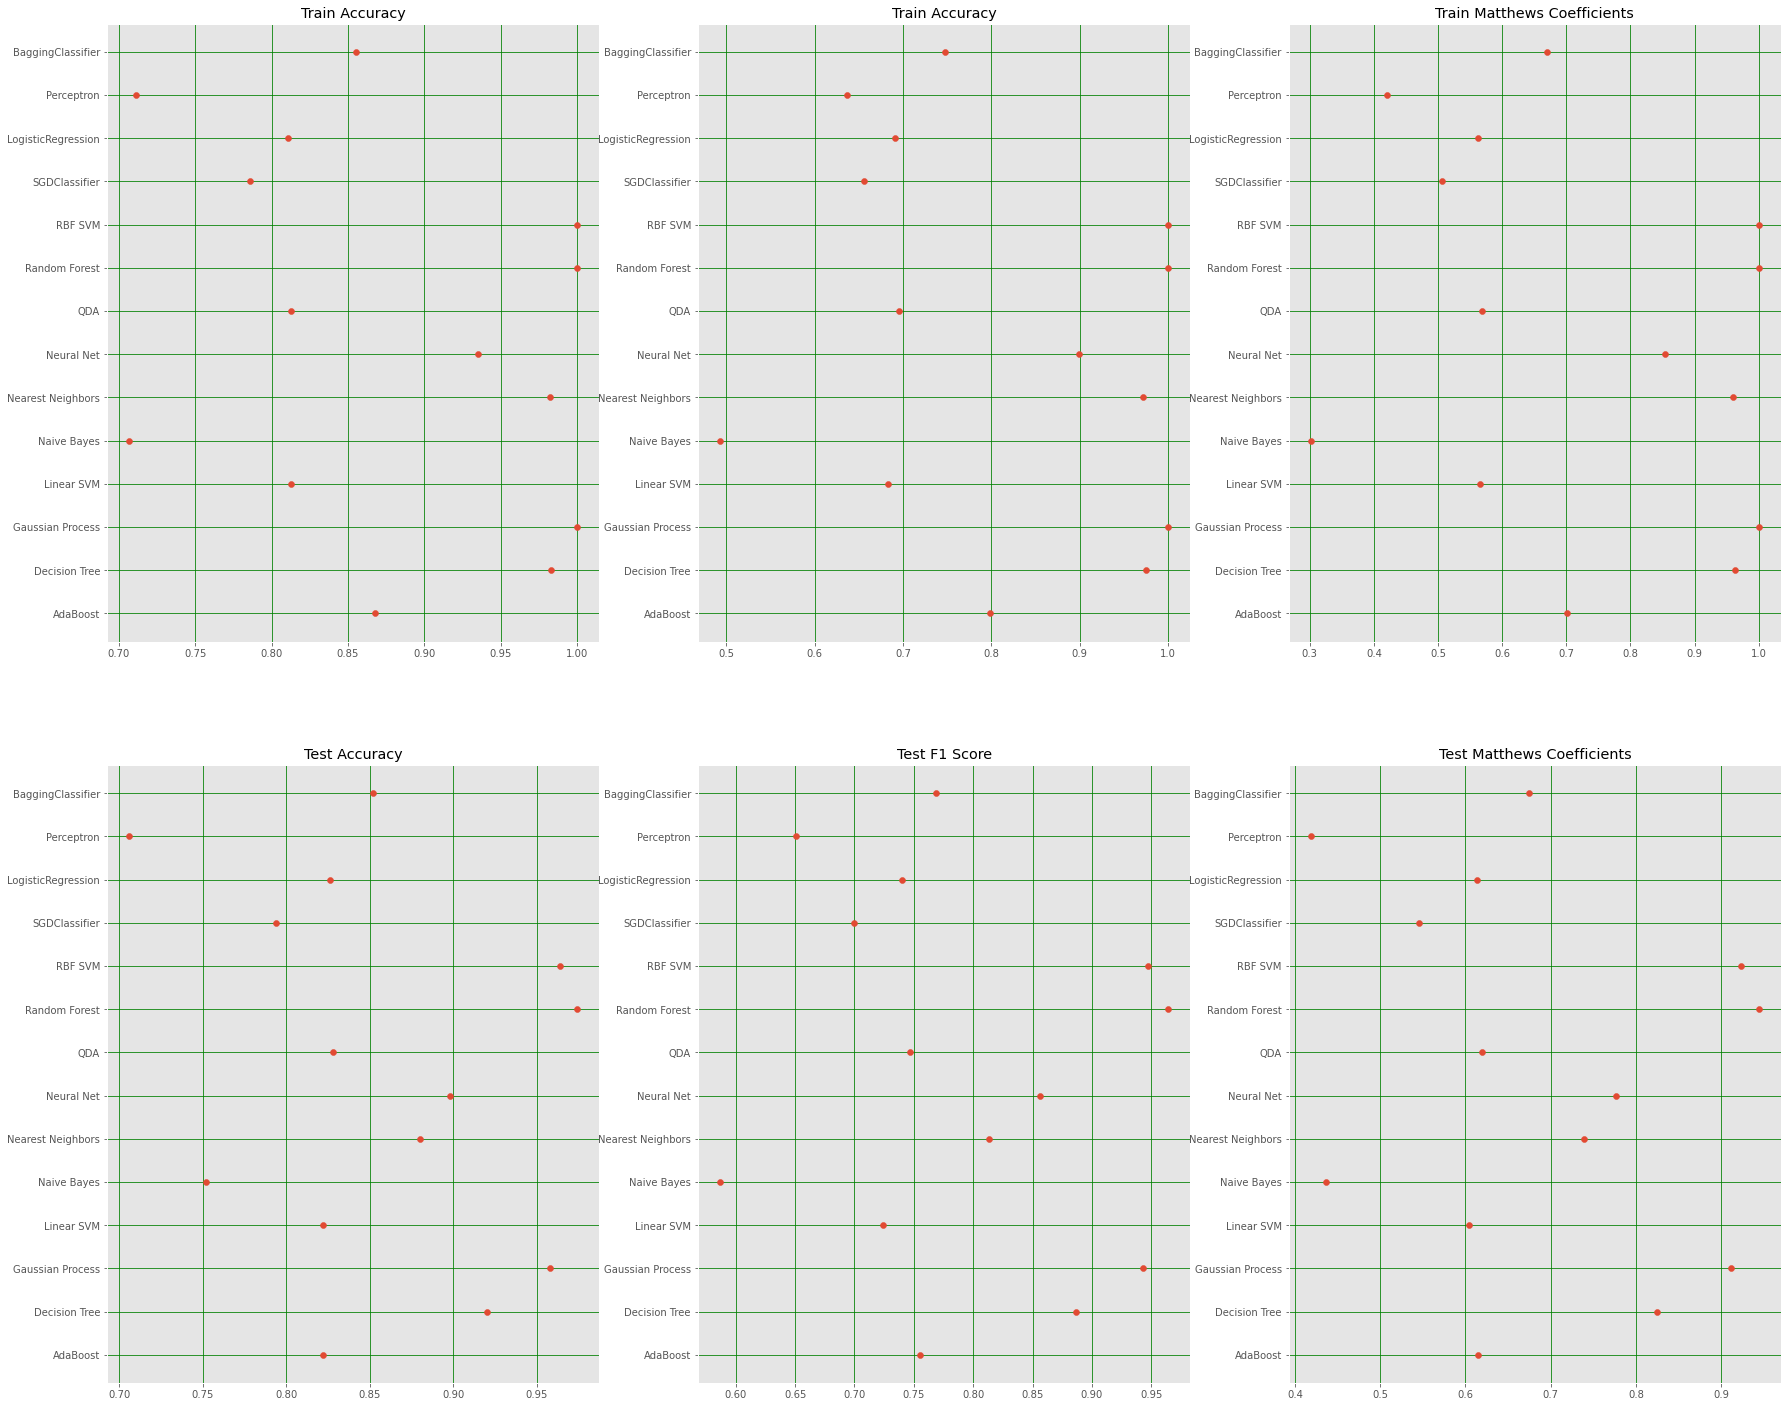

In [13]:
plt.rcParams['figure.figsize'] = (30.0, 25.0)
figs, ax = plt.subplots(2,3)

ax[0,0].scatter(x =  train_accuracy_score,y = clf_names)
ax[0,0].set_title("Train Accuracy")
ax[0,0].grid(True, color = 'g')

ax[0,1].scatter(x =  train_f1score,y = clf_names)
ax[0,1].set_title("Train Accuracy")
ax[0,1].grid(True, color = 'g')

ax[0,2].scatter(x =  train_matthews,y = clf_names)
ax[0,2].set_title("Train Matthews Coefficients")
ax[0,2].grid(True, color = 'g')


ax[1,0].scatter(test_accuracy_score,clf_names)
ax[1,0].set_title("Test Accuracy")
ax[1,0].grid(True, color = 'g')


ax[1,1].scatter(test_f1score,clf_names)
ax[1,1].set_title("Test F1 Score")
ax[1,1].grid(True, color = 'g')

ax[1,2].scatter(test_matthews,clf_names)
ax[1,2].set_title("Test Matthews Coefficients")
ax[1,2].grid(True, color = 'g')

plt.show()

When compared to the linear input features, although some of the models performed better with polynomial input features, the ones with the best accuracies did not improve. 

One can combine the few best multiple models into a single model to obtain a hopefully better accuracy. The models are combined using the Stacking Classifier. That is, combining the prediction probabilities from multiple machine learning models on the same dataset. 

In [14]:
#THE STACKING CLASSIFIER
#Let's use the combination of the prediction probability of the best five classifiers

bestclassifiers = [
    ("Random Forest",RandomForestClassifier(n_jobs=2, random_state=1)),
    ("RBF SVM",SVC(gamma=2, C=1,probability=True)),
    ("Gaussian Process", GaussianProcessClassifier(1.0 * RBF(1.0))),
    ("Decision Tree", DecisionTreeClassifier(max_depth=10)),
    ("Nearest Neighbors",KNeighborsClassifier(2))
                  ] 

#Build the stack model
stack_model = StackingClassifier( estimators = bestclassifiers, final_estimator = RandomForestClassifier(n_jobs=2, random_state=1) )
#I used the best estimator as my final estimator to optimise the result.


#train the stack model
stack_model.fit(X_train, y_train)
    
# The prediction for both training and testing 
stack_model.predict(X_test)
stack_model.predict(X_train)

# Measure training accuracy

print("The Training Accuracy Score: ", accuracy_score(y_train, stack_model.predict(X_train)) )
print("The Training F1 Score: ", f1_score(y_train, stack_model.predict(X_train)) )
print("The Training Matthews coefficient: ", matthews_corrcoef(y_train, stack_model.predict(X_train)))
print(n+" training score done!")
    
# Measure test accuracy 

print("The Accuracy Score: ", accuracy_score(y_test, stack_model.predict(X_test)))
print("Test F1 Score: ",f1_score(y_test,stack_model.predict(X_test)))
print("The Testing Matthews coefficient: ", matthews_corrcoef(y_test, stack_model.predict(X_test)))


The Training Accuracy Score:  1.0
The Training F1 Score:  1.0
The Training Matthews coefficient:  1.0
BaggingClassifier training score done!
The Accuracy Score:  0.958
Test F1 Score:  0.943089430894309
The Testing Matthews coefficient:  0.9105202640213195


Although the stack_model (with accuracy score = 0.97, f1 score = 0.958 and Matthews coefficient = 0.934) performed way better than most of the models used, it is still not as accurate as the Random Forest Classifier (with accuracy Score = 0.978 , f1 score = 0.969 and Matthews coefficient = 0.952). So, I would rather stick with the single model when deploying.  

# Most important feature

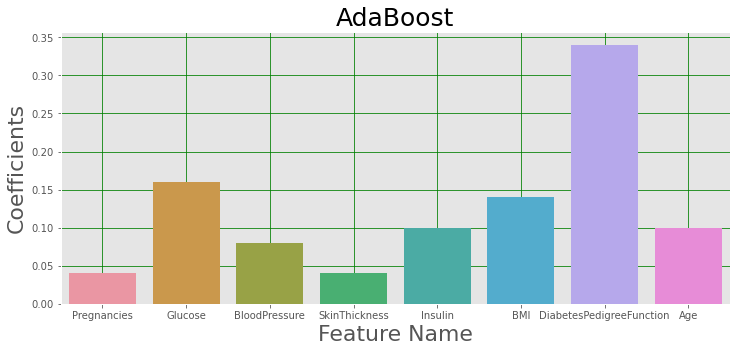

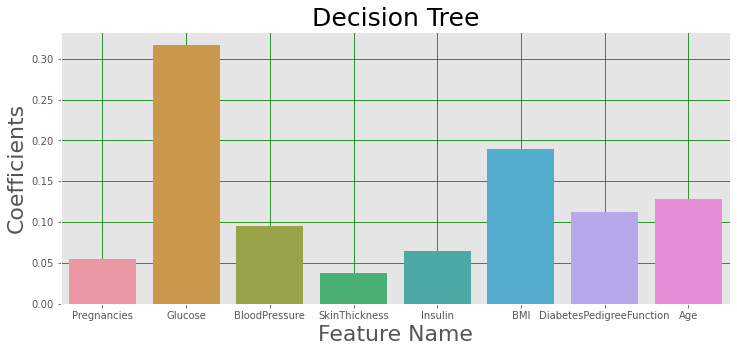

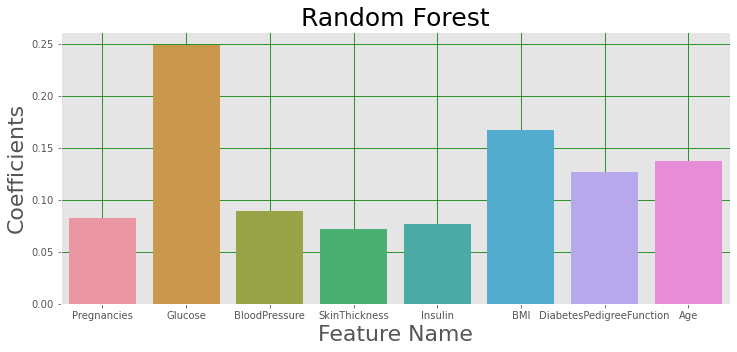

In [15]:
#to obtain the feature importance 
plt.rcParams['figure.figsize'] = (12.0, 5.0) 

theclassifiers = classifiers_ = [
    ("AdaBoost", AdaBoostClassifier()),
    ("Decision Tree", DecisionTreeClassifier(max_depth=10)),
    ("Random Forest",RandomForestClassifier(n_jobs=2, random_state=1))
    ]  
#NB: these classifiers are considered because they are only once amongst the classfiers considered that run with the 
# fitted attribute "feature_importances_"



for n,clif in theclassifiers:
    clif.fit(X_train, y_train)
#put the name of the column heads in a list
    column_head = diabetes_data.drop(["Outcome"], axis = 1).columns

#obtain the coefficients of the features
    coefs = clif.feature_importances_.flatten()
    
#Make a bar chart of the coefficients
    sns.barplot(x=column_head[0:len(column_head)],
                y=coefs[0:len(column_head)])
    plt.title(n, fontsize=25)
    plt.ylabel("Coefficients", fontsize=22)
    plt.xlabel("Feature Name", fontsize=22)
    plt.grid(True, color = "g")
    plt.show()

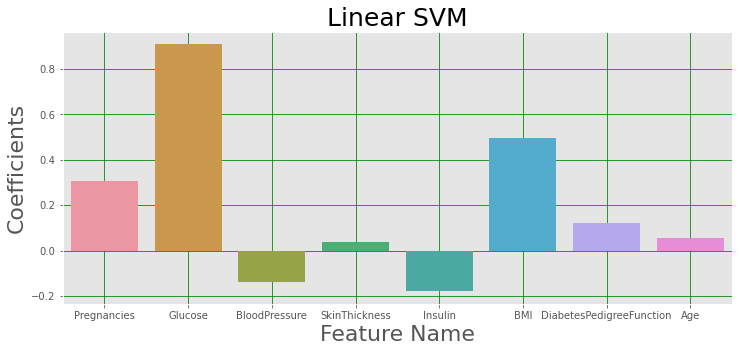

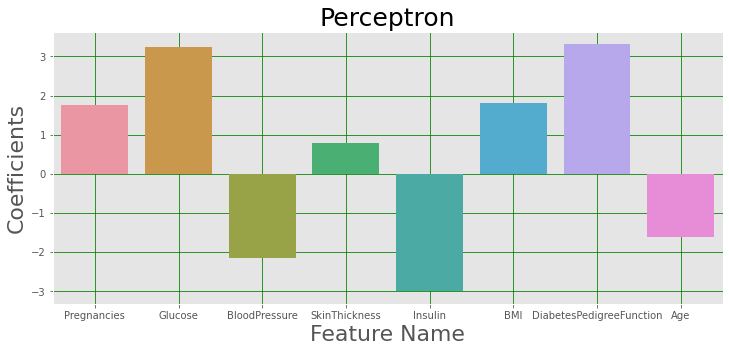

In [16]:
#to obtain the feature importance 
plt.rcParams['figure.figsize'] = (12.0, 5.0)

theclassifiers = [   
    ("Linear SVM", SVC(kernel="linear", C=1,probability=True)),
    ("Perceptron", Perceptron(tol=1e-3, random_state=0))
    ] 
#NB: these classifiers are considered because they are only once amongst the classfiers considered that run with the 
# fitted attribute "coef_"

for n,clif in theclassifiers:
    clif.fit(X_train, y_train)

#put the name of the column heads in a list
    column_head = diabetes_data.drop(["Outcome"], axis = 1).columns

#obtain the coefficients of the features
    coefs = clif.coef_.flatten()
    
#Make a bar chart of the coefficients
    sns.barplot(x=column_head,
                y=coefs)
    plt.title(n, fontsize=25)
    plt.ylabel("Coefficients", fontsize=22)
    plt.xlabel("Feature Name", fontsize=22)
    plt.grid(True, color = "g")
    plt.show()

The graphs above show varying values of importance for the features (as expected) depending on the model deployed. The non-zero coefficients values suggest that all the features are important. All the features are essentially used in the model such that removing anyone would affect the accuracy of the model. 

# Deploying the model

Since we have found out that the best model is the RandomForestClassifier. This model is typically deployed by exporting the model and binding it with an application API. Here, I will just try to take the details of the from the patient to predict if the patient has diabetes or not. 

In [17]:
#PREGNANCIES
pregnancies = input("How many preganancies has the patient had:\n ")
pregnancies  = int(pregnancies)

#GLUCOSE LEVEL
glucose_level = input("Glucose Level: \n ")
glucose_level = float(glucose_level)

#BLOOD PRESSURE
blood_pressure = input("Blood Pressure: \n ")
blood_pressure = float(blood_pressure)
    
#Skin Thickness
skin_thickness = input("Skin Thickness:\n ")
skin_thickness = float(skin_thickness)

#Insulin level
insulin_level = input("Insulin level:\n ")
insulin_level = float(insulin_level)

#Body mass index (BMI) 
bmi = input("Body mass index (BMI):  \n ")
bmi = float(bmi)

#Diabetes Pedigree Function 
diabetes_ped  = input("Diabetes Pedigree Function: \n")
diabetes_ped = float(diabetes_ped)

#Age
age = input("Age: \n")
age = int(age)

1

    
#The prediction based on the details
print("\n\n THE DIABETES PREDICTION: ")
Xnew = [[pregnancies, glucose_level, blood_pressure, skin_thickness, insulin_level, bmi, diabetes_ped, age]]
Xnew = sc.transform(Xnew)

RandomForestCF = RandomForestClassifier(n_jobs=2, random_state=1)
RandomForestCF.fit(X_train, y_train)

ynew = RandomForestCF.predict(Xnew)
if ynew[0]==0: 
    print("No diabetes detected!!!")
elif ynew[0]==1:
    print("Diabetes detected!!!") 

How many preganancies has the patient had:
 0
Glucose Level: 
 90
Blood Pressure: 
 70
Skin Thickness:
 35
Insulin level:
 50
Body mass index (BMI):  
 45.7
Diabetes Pedigree Function: 
0.5
Age: 
32


 THE DIABETES PREDICTION: 
No diabetes detected!!!
